# Chapter 4 - Vector Applications

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format

plt.rcParams.update({'font.size':14}) # set global fonts

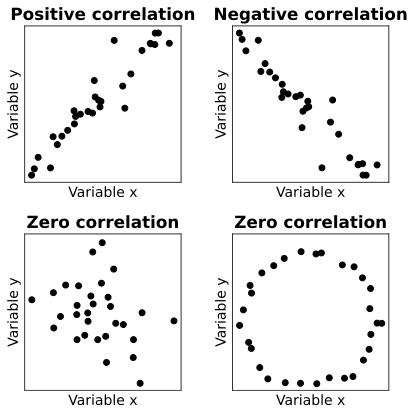

In [17]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation', fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation', fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.savefig('Figure_04_01.png',dpi=300)
plt.show()

# Coding Exercise

# Exercise 1

Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call `np.corrcoef` and `spatial.distance.cosine`. Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

In [56]:
# 2 vectors as inputs and 2 results as inputs
x = np.array([5,2])
y = np.array([4,-5])

def pearCos (x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # print(x_mean, y_mean)

    xm = x - x_mean
    ym = y - y_mean
    
    # compute pearson correlation coefficient
    pearson = np.dot(xm, ym) / np.linalg.norm(xm) * np.linalg.norm(ym)
    print(pearson)

    # compute cosine similarity
    cosine = np.dot(x,y) / np.linalg.norm(x) * np.linalg.norm(y)
    # print('cosine = ', cosine )
    return pearson, cosine

a = np.random.randn(15)
b = np.random.randn(15)

r,c = pearCos(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

[ 0.5685204  -0.72595946 -1.10981798  0.54168317 -0.19920498  1.10859455
 -1.54695681 -0.88547597 -0.41414217  0.67130777  0.08735259  2.49663799
 -0.41717492 -0.1273817   0.43579732]
[ 0.5685204  -0.72595946 -1.10981798  0.54168317 -0.19920498  1.10859455
 -1.54695681 -0.88547597 -0.41414217  0.67130777  0.08735259  2.49663799
 -0.41717492 -0.1273817   0.43579732] 0.01720610075421665


In [68]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(pearCos(a,b))
print(' ')

print('With mean-centering (should be the same):')
print( pearCos(aNoMean,bNoMean) )


Without mean-centering (should differ):
[ 0.05575597  0.26540469  0.69041668  1.20394928  0.37559789 -0.31187604
 -0.1207455   0.13375766 -0.08536484  0.05761198 -0.06505554 -0.11177495
 -0.75904494 -0.39148098 -0.41426348]
(array([ 0.05575597,  0.26540469,  0.69041668,  1.20394928,  0.37559789,
       -0.31187604, -0.1207455 ,  0.13375766, -0.08536484,  0.05761198,
       -0.06505554, -0.11177495, -0.75904494, -0.39148098, -0.41426348]), 5.814472240070516)
 
With mean-centering (should be the same):
[ 0.05575597  0.26540469  0.69041668  1.20394928  0.37559789 -0.31187604
 -0.1207455   0.13375766 -0.08536484  0.05761198 -0.06505554 -0.11177495
 -0.75904494 -0.39148098 -0.41426348]
(array([ 0.05575597,  0.26540469,  0.69041668,  1.20394928,  0.37559789,
       -0.31187604, -0.1207455 ,  0.13375766, -0.08536484,  0.05761198,
       -0.06505554, -0.11177495, -0.75904494, -0.39148098, -0.41426348]), 0.522887889259296)
